In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("rocket_fuel.csv")
df

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14
...,...,...,...,...,...,...
588096,1278437,1,0,1,2,23
588097,1327975,1,0,1,2,23
588098,1038442,1,0,3,2,23
588099,1496395,1,0,1,2,23


In [159]:
control_group = df[df['test'] == 0]
treat_group = df[df['test'] == 1]

# Calculating conversion rates
conversion_rate_control = control_group['converted'].mean()
conversion_rate_treat = treat_group['converted'].mean()

conversion_rate_control, conversion_rate_treat

(0.01785410644448223, 0.025546559636683747)

In [161]:
from statsmodels.stats.proportion import proportions_ztest

# Count of conversions in each group
count = [treat_group['converted'].sum(), control_group['converted'].sum()]

# Number of observations in each group
nobs = [treat_group['converted'].count(), control_group['converted'].count()]

# Performing the two-proportion z-test
stat, pval = proportions_ztest(count, nobs)

stat, pval

(7.3700781265454145, 1.7052807161559727e-13)

In [93]:
df.columns

Index(['user_id', 'test', 'converted', 'tot_impr', 'mode_impr_day',
       'mode_impr_hour'],
      dtype='object')

In [94]:
control = len(df[df['test']==0])
test = len(df[df['test']==1])
print("test len", test)
print("control len", control)

test len 564577
control len 23524


In [95]:
total_converted = len(df[df['converted']==1])
print("#converted: ", total_converted)
revenue = 100 * total_converted
print("revenue: ", revenue)

#converted:  14843
revenue:  1484300


In [96]:
impression = df['tot_impr'].sum()
impression
print("#impression", impression)
cost = impression/1000 * 9
print("cost:", cost)
variable_cost = 40*total_converted
print("ROI:", (revenue-cost-variable_cost)/(cost+variable_cost) *100)

#impression 14597182
cost: 131374.638
ROI: 104.704313369919


In [98]:
(control+test)/test

1.0416665928651008

In [97]:
revenue * ((control+test)/test) - revenue

61845.72378966911

In [99]:
0.0416*(revenue)

61746.88

In [100]:
0.0416*(revenue-cost-variable_cost)

31582.943059199995

In [114]:
bins = pd.cut(df['tot_impr'], 50)
df['impr_bin'] = bins.apply(lambda x: x.left)
df

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour,impr_bin
0,1069124,1,0,130,1,20,124.840
1,1119715,1,0,93,2,22,83.560
2,1144181,1,0,21,2,18,-1.064
3,1435133,1,0,355,2,10,331.240
4,1015700,1,0,276,5,14,248.680
...,...,...,...,...,...,...,...
588096,1278437,1,0,1,2,23,-1.064
588097,1327975,1,0,1,2,23,-1.064
588098,1038442,1,0,3,2,23,-1.064
588099,1496395,1,0,1,2,23,-1.064


In [131]:
df_bin = df[['converted','test', 'impr_bin']].groupby(['impr_bin','test'], group_keys=False).mean().dropna().reset_index()
display(df_bin)
# df['converted_by_bin'] = df[['impr_bin','test']].apply(lambda x:df_bin[df_bin['impr_bin']==x and df_bin['test']==]['converted'].values[0])
# df

,impr_bin,test,converted
0,-1.064,0,0.008660
1,-1.064,1,0.009327
2,42.280,0,0.047400
3,42.280,1,0.090695
4,83.560,0,0.079063
5,83.560,1,0.169816
6,124.840,0,0.125424
7,124.840,1,0.179947
8,166.120,0,0.109091
9,166.120,1,0.164026


In [116]:
# df_conversion_impression = df[['test', 'impr_bin','converted_by_bin']].drop_duplicates()
# df_conversion_impression

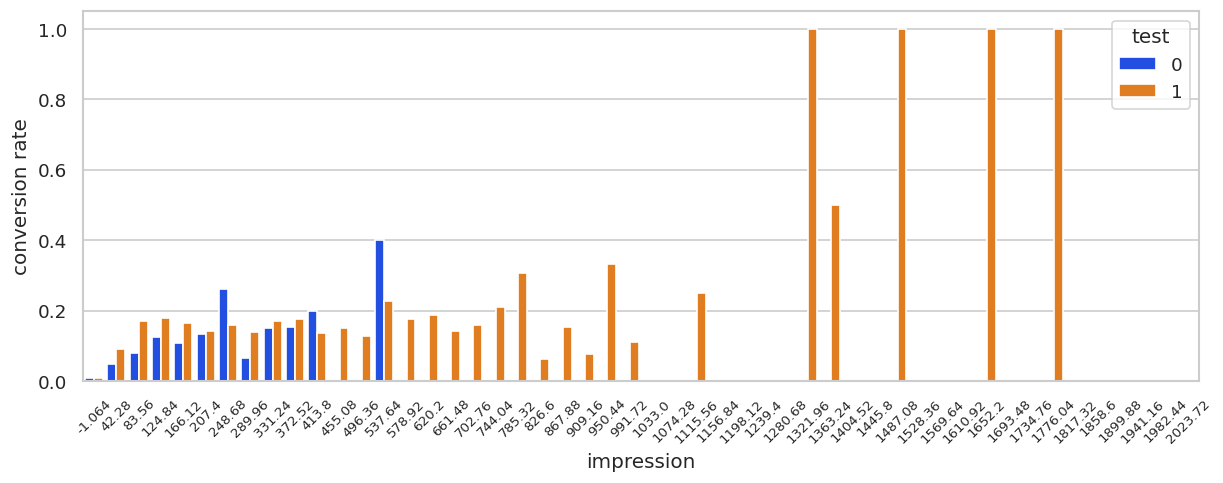

In [132]:
plt.figure(figsize=(12,4), dpi=120)
sns.set(style="whitegrid", palette="bright")
sns.barplot(df_bin, x='impr_bin', y='converted', hue = 'test')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('impression')
plt.ylabel('conversion rate')
plt.show()

In [134]:
df_conv_by_hour = df[['test','converted', 'mode_impr_hour']].groupby(['mode_impr_hour','test']).mean().reset_index()
df_conv_by_hour

,mode_impr_hour,test,converted
0,0,0,0.000000
1,0,1,0.019213
2,1,0,0.000000
3,1,1,0.013434
4,2,0,0.000000
5,2,1,0.007570
6,3,0,0.011236
7,3,1,0.010425
8,4,0,0.000000
9,4,1,0.015850


In [158]:
(df_conv_by_hour[df_conv_by_hour['test']==1].reset_index()-df_conv_by_hour[df_conv_by_hour['test']==0].reset_index())['converted'][8:]

8     0.009239
9     0.008714
10    0.008372
11    0.007913
12    0.007149
13    0.008473
14    0.012524
15    0.004681
16    0.002838
17    0.008292
18    0.002293
19    0.002295
20    0.012632
21    0.006973
22    0.010097
23    0.010046
Name: converted, dtype: float64

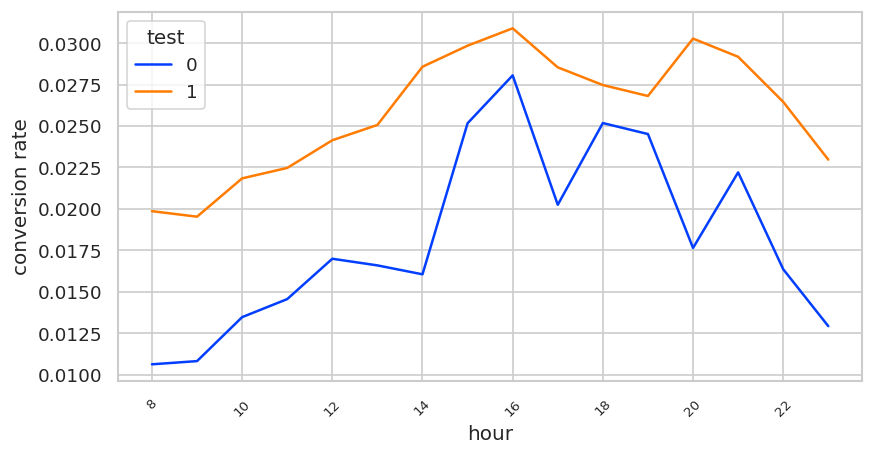

In [138]:
plt.figure(figsize=(8,4), dpi=120)
sns.lineplot(df_conv_by_hour[df_conv_by_hour['mode_impr_hour']>=8], x='mode_impr_hour', y='converted', hue = 'test')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('hour')
plt.ylabel('conversion rate')
plt.show()

In [140]:
df_conv_by_day = df[['test','converted', 'mode_impr_day']].groupby(['mode_impr_day','test']).mean().reset_index()
df_conv_by_day

,mode_impr_day,test,converted
0,1,0,0.022559
1,1,1,0.033241
2,2,0,0.014448
3,2,1,0.030440
4,3,0,0.015759
5,3,1,0.025356
6,4,0,0.020230
7,4,1,0.021637
8,5,0,0.016303
9,5,1,0.022465


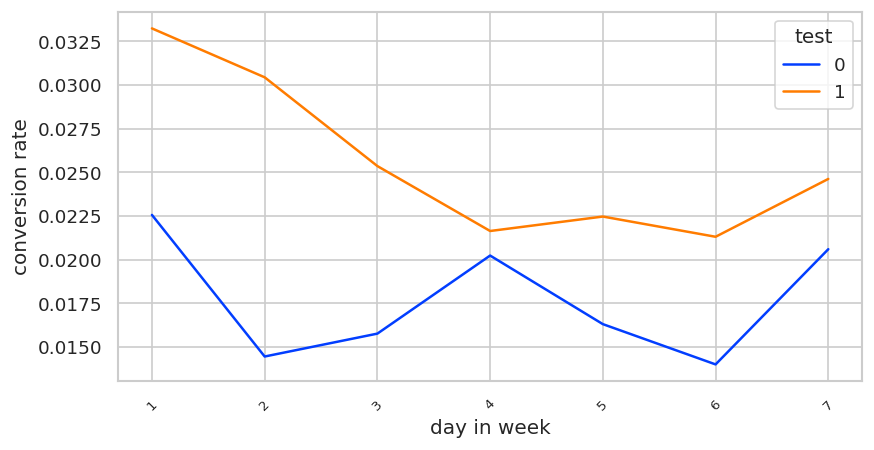

In [142]:
plt.figure(figsize=(8,4), dpi=120)
sns.lineplot(df_conv_by_day, x='mode_impr_day', y='converted', hue = 'test')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('day in week')
plt.ylabel('conversion rate')
plt.show()

In [146]:
df_conv_by_day[df_conv_by_day['test']==1].reset_index()-df_conv_by_day[df_conv_by_day['test']==0].reset_index()

,index,mode_impr_day,test,converted
0,1,0,1,0.010683
1,1,0,1,0.015992
2,1,0,1,0.009597
3,1,0,1,0.001407
4,1,0,1,0.006162
5,1,0,1,0.007311
6,1,0,1,0.004025
